In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore

from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pma

import time

import warnings; warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
ys = pd.read_csv('D:/Boston Institute of Analytics/9. Time Series Analysis with Arima & Sarima/yahoo_stock.csv')
ys.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [3]:
#Info of the dataset
ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [4]:
#Converting the 'Date' column to datetime format
ys['Date'] = pd.to_datetime(ys['Date'])
ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB


In [5]:
#Setting the 'Date' column as index before proceeding with timeseries analysis
ys.set_index('Date', inplace=True)

In [6]:
#Displaying the head and info of the data
display(ys.head())
ys.info()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1825 non-null   float64
 1   Low        1825 non-null   float64
 2   Open       1825 non-null   float64
 3   Close      1825 non-null   float64
 4   Volume     1825 non-null   float64
 5   Adj Close  1825 non-null   float64
dtypes: float64(6)
memory usage: 99.8 KB


In [7]:
#Seperating the 'close' column
ysc = ys['Close']
ysc.head()

Date
2015-11-23    2086.590088
2015-11-24    2089.139893
2015-11-25    2088.870117
2015-11-26    2088.870117
2015-11-27    2090.110107
Name: Close, dtype: float64

In [8]:
#Defining the train and test size
tr_size = int(len(ysc) * 0.9)
print(tr_size)

1642


In [9]:
#Splitting the data into train and test set
ysc_tr, ysc_te = ysc[:tr_size], ysc[tr_size:]

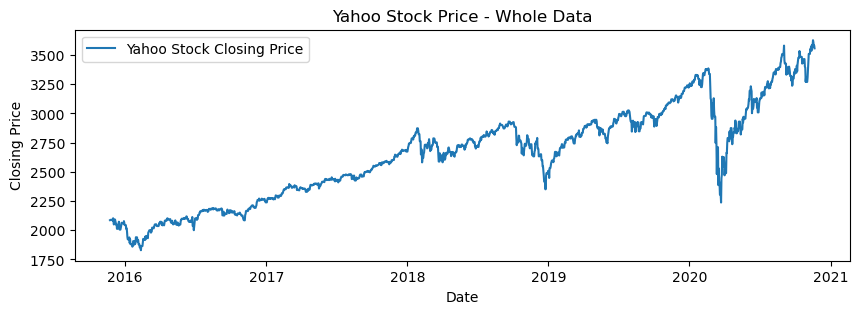

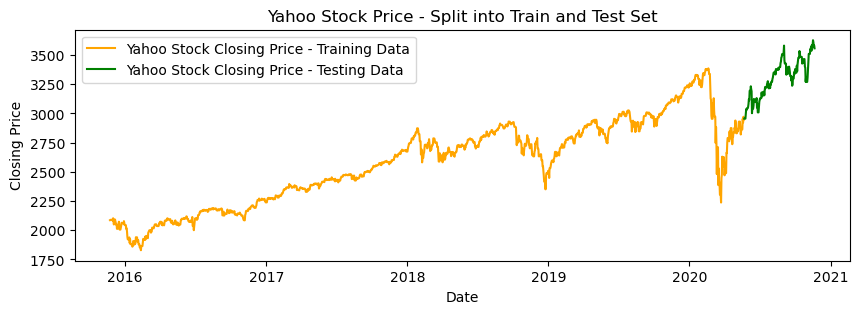

In [10]:
#Plotting the whole dataset
plt.figure(figsize=(10, 3))
plt.plot(ysc, label='Yahoo Stock Closing Price')
plt.title('Yahoo Stock Price - Whole Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#Plotting the dataset as a split for train and test set
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.title('Yahoo Stock Price - Split into Train and Test Set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

## Decomposing the Time Series

### Additive Model

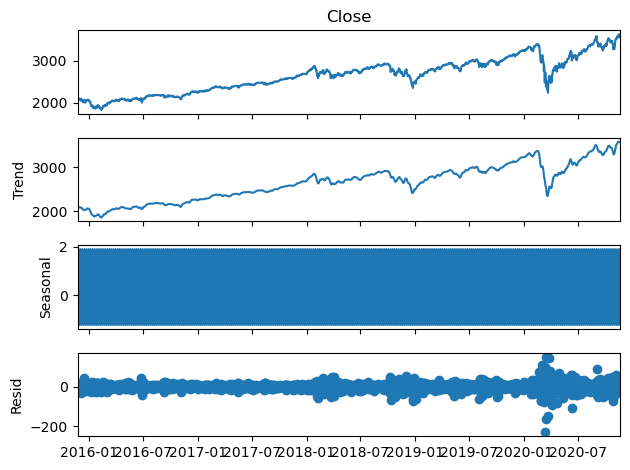

In [11]:
#Decomposing the ysc time series with 'Additive' model
decomp_ts_add = seasonal_decompose(ysc, model='additive')

#Plotting the decomposed timeseries
decomp_ts_add.plot()
plt.show()

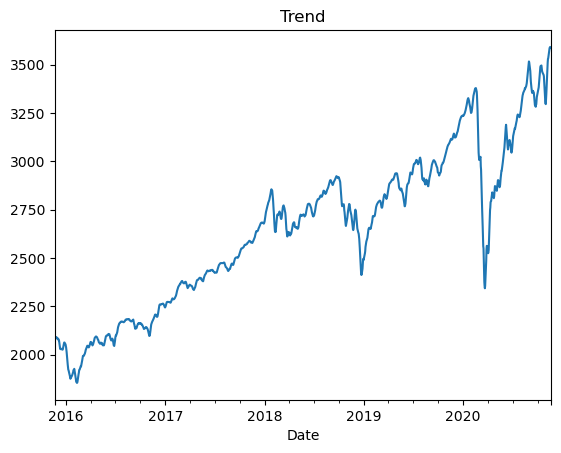

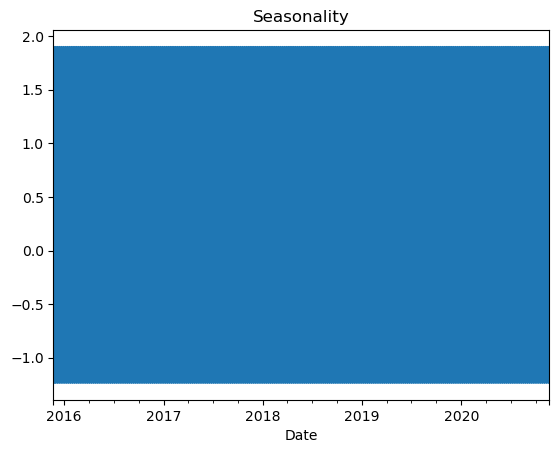

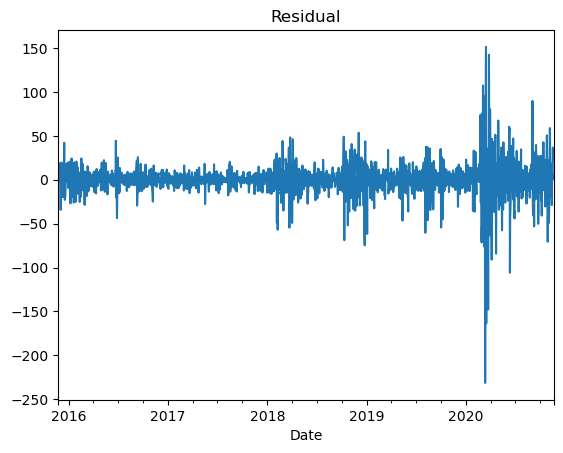

In [12]:
trend_add = decomp_ts_add.trend
seasonal_add = decomp_ts_add.seasonal
residual_add = decomp_ts_add.resid

trend_add.plot()
plt.title('Trend')
plt.show()

seasonal_add.plot()
plt.title('Seasonality')
plt.show()

residual_add.plot()
plt.title('Residual')
plt.show()

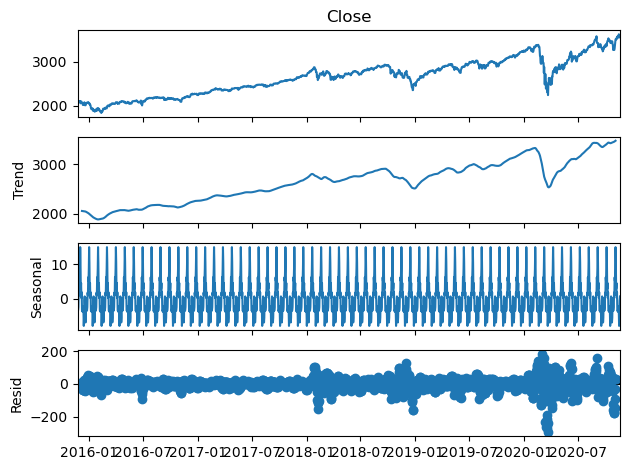

In [13]:
#Decomposing the ysc time series with 'Additive' model and period = 30 (monthly)
decomp_ts_add_p30 = seasonal_decompose(ysc, model='additive', period=30)

#Plotting the decomposed timeseries
decomp_ts_add_p30.plot()
plt.show()

### Multiplicative Model

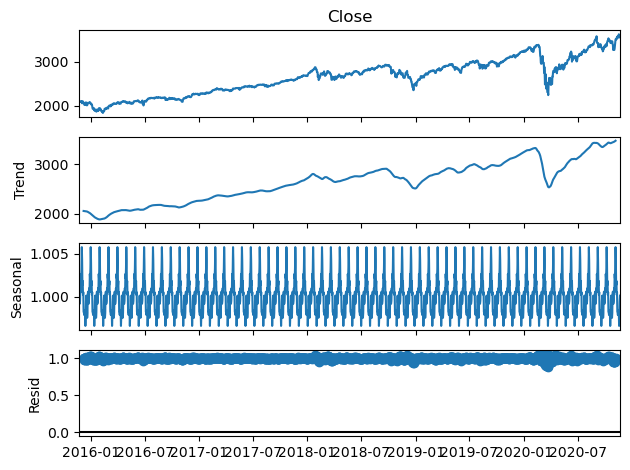

In [14]:
#Decomposing the ysc time series with 'Multiplicative' model and period = 30 (monthly)
decomp_ts_mlt_p30 = seasonal_decompose(ysc, model='multiplicative', period=30)

#Plotting the decomposed timeseries
decomp_ts_mlt_p30.plot()
plt.show()

## Checking the Stationarity - Getting the d and D values

In [15]:
# Define a function to check stationarity using adfuller test and perform differencing
def test_stationarity(timeseries):
    '''This function takes the timeseries as input and performs AdFuller test to check Stationarity.'''
    
    #Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    #print(dftest)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    dfoutput['AIC Score'] = dftest[5]

    return dfoutput

In [16]:
#Checking the Stationarity of the original TS - ysc
test_stationarity(ysc)

Test Statistic                    -0.870397
p-value                            0.797565
#Lags Used                        23.000000
Number of Observations Used     1801.000000
Critical Value (1%)               -3.433986
Critical Value (5%)               -2.863146
Critical Value (10%)              -2.567625
AIC Score                      16826.469382
dtype: float64

##### Observatios of Augmented-Dickey Fuller Test:
- Here the time series for Yahoo stock for closing price when tested for Stationarity, it resulted in favour of Null Hypothesis ($𝐻_0$: Time Series is Non-Stationary) as the p-value (0.79) is greater than all the 3 $\alpha$ values (0.01, 0.05 and 0.1)
- This is also confirmed ussing the test stastics values of -0.87 which is greater than all the cirtical values (-3.43, -2.86 and -2.57).
- Hence the time series 'ysc' is **Non-Stationary**.
- So we need to perform the differencing.

In [17]:
#Taking the difference with shift 1
#ysc_diff1 = ysc - ysc.shift(1)
ysc_diff1 = ysc.diff(periods=1)

In [18]:
#Displaying the difference
ysc_diff1

Date
2015-11-23          NaN
2015-11-24     2.549805
2015-11-25    -0.269775
2015-11-26     0.000000
2015-11-27     1.239990
                ...    
2020-11-16    41.760010
2020-11-17   -17.379883
2020-11-18   -41.739990
2020-11-19    14.080078
2020-11-20   -24.330078
Name: Close, Length: 1825, dtype: float64

In [19]:
#Removing the null values
ysc_diff1.dropna(inplace=True)

In [20]:
#Displaying the difference column after removing null values
ysc_diff1

Date
2015-11-24     2.549805
2015-11-25    -0.269775
2015-11-26     0.000000
2015-11-27     1.239990
2015-11-28     0.000000
                ...    
2020-11-16    41.760010
2020-11-17   -17.379883
2020-11-18   -41.739990
2020-11-19    14.080078
2020-11-20   -24.330078
Name: Close, Length: 1824, dtype: float64

In [21]:
#Again testing the stationarity after taking the difference of 1 (ysc_diff1)
test_stationarity(ysc_diff1)

Test Statistic                -8.522188e+00
p-value                        1.093086e-13
#Lags Used                     2.200000e+01
Number of Observations Used    1.801000e+03
Critical Value (1%)           -3.433986e+00
Critical Value (5%)           -2.863146e+00
Critical Value (10%)          -2.567625e+00
AIC Score                      1.681703e+04
dtype: float64

##### Observation of Stationarity test using Adfuller test on Yahoo Stock Closing price with difference (shift) of 1 : d=1
- The p-value obaserved is to the power of $10^{-13}$ which suggest it is very much lower the the 3 $\alpha$ values (0.01, 0.05 and 0.1).
- Also the test statistics is -8.52 which is lower than the critical values (-3.43, -2.86 and -2.57).
- Hence here the Null-Hypothesis ($H_0$: Time Series is Non-Stationary) is rejected in the favour of Alternate Hypothesis ($H_a$: Time Series is Stationary)
- To conclude, the differencing of 1 made the time series **Stationary**.

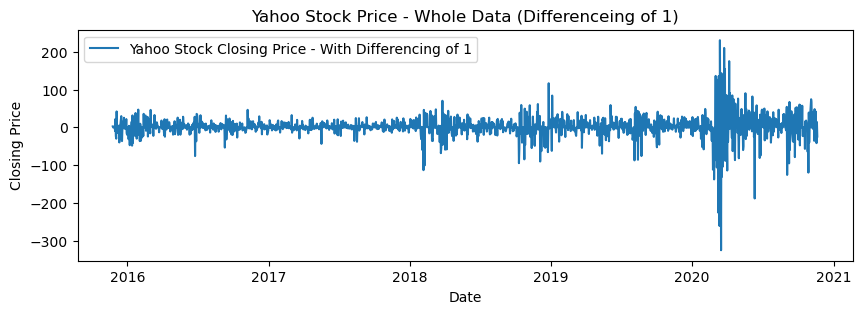

In [22]:
#Plotting the 'ysc_diff1'
plt.figure(figsize=(10, 3))
plt.plot(ysc_diff1, label='Yahoo Stock Closing Price - With Differencing of 1')
plt.title('Yahoo Stock Price - Whole Data (Differenceing of 1)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [23]:
#Defining the train and test size
tr_size = int(len(ysc_diff1) * 0.9)
print(tr_size)

1641


In [24]:
#Splitting the data into train and test set
ysc_diff1_tr, ysc_diff1_te = ysc_diff1[:tr_size], ysc_diff1[tr_size:]

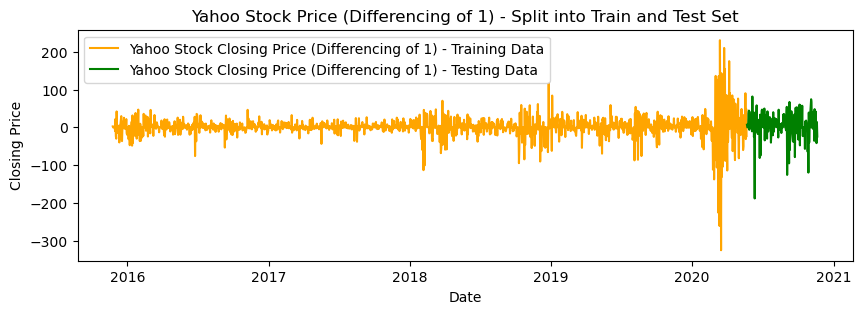

In [25]:
#Plotting the dataset as a split for train and test set
plt.figure(figsize=(10, 3))
plt.plot(ysc_diff1_tr, label='Yahoo Stock Closing Price (Differencing of 1) - Training Data', color='orange')
plt.plot(ysc_diff1_te, label='Yahoo Stock Closing Price (Differencing of 1) - Testing Data', color='green')
plt.title('Yahoo Stock Price (Differencing of 1) - Split into Train and Test Set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [26]:
#Checking the Stationarity for 30 observations (1 season)
test_stationarity(ysc.diff(periods=30).dropna())

Test Statistic                -8.763780e+00
p-value                        2.630900e-14
#Lags Used                     2.400000e+01
Number of Observations Used    1.770000e+03
Critical Value (1%)           -3.434050e+00
Critical Value (5%)           -2.863174e+00
Critical Value (10%)          -2.567640e+00
AIC Score                      1.760375e+04
dtype: float64

#### Observation of Stationarity of the Seasonal component of multiplicative time series with period 30 (monthly): D=0
- Null-Hypothesis ($H_0$: TS is Non-Stationary) is reject in favour of Alternate Hypothesis ($H_a$: TS is Stationary)

## Getting the p and q values using ACF and PCAF

##### Generating the p and q values for the Time Series
- We get p parameter value from PACF (Partial Auto Correlation Function) Graph
- While the q parameter value is obtained from ACF (Auto Correlation Function) Graph

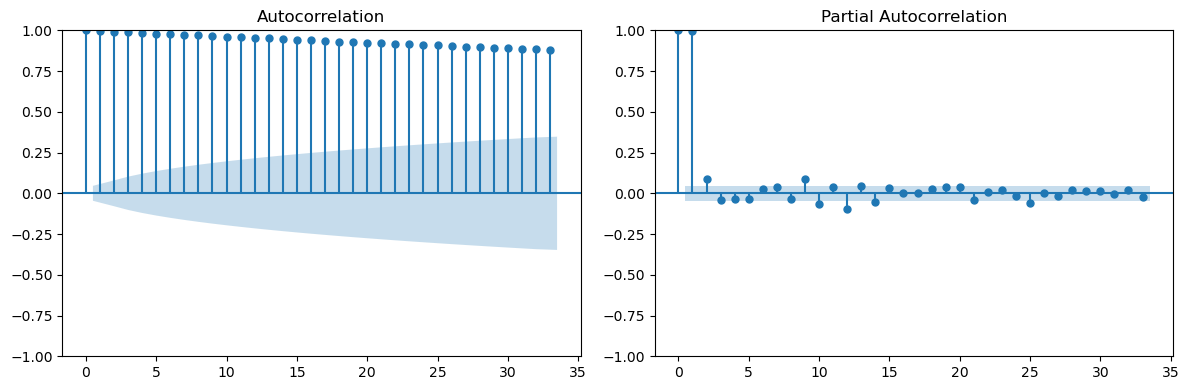

In [27]:
#Plotting the ACF and PACF of the original Time Series (ysc)
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(ysc, ax=axes[0])
plot_pacf(ysc, ax=axes[1])
plt.tight_layout()

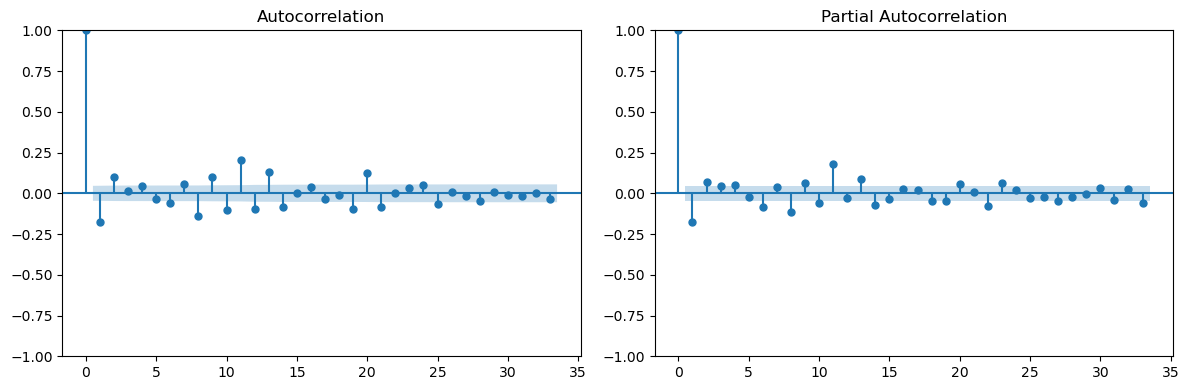

In [28]:
#Plotting the ACF and PACF of the d Time Differenced Time Series (ysc_diff1)
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(ysc_diff1, ax=axes[0])
plot_pacf(ysc_diff1, ax=axes[1])
plt.tight_layout()

##### Observations:
- p: 2 can be preferred, but taking the value of 1 is also fine
- q: 2 can be preferred, but taking the value of 1 is also fine

##### Generating the P and Q values for Seasonal component

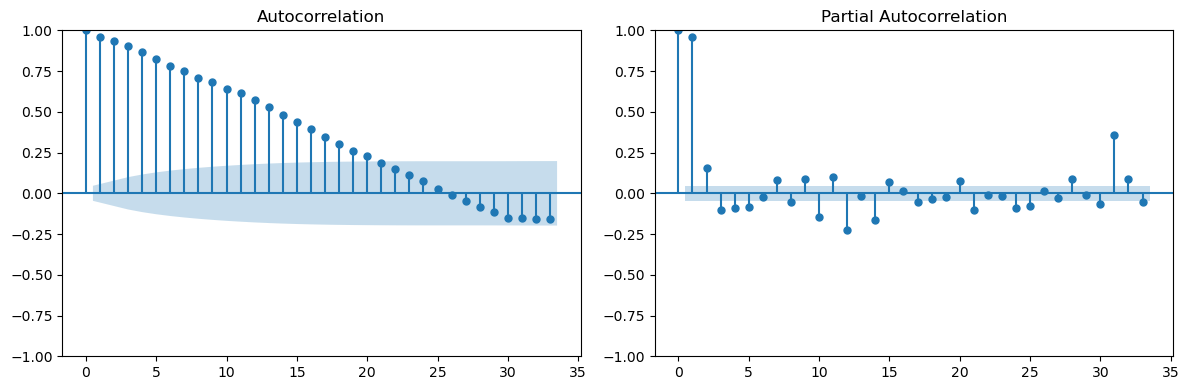

In [29]:
#Plotting the ACF and PACF graph for Seasonal component with periods = 30 (monthly)
fig, axes = plt.subplots(1,2, figsize=(12, 4))
plot_acf(ysc.diff(periods=30).dropna(), ax=axes[0])
plot_pacf(ysc.diff(periods=30).dropna(), ax=axes[1])
plt.tight_layout()

## Fitting the models

### 1. ARIMA MODEL

#### 1.1. Using the Differenced Time Series (ysc_diff1)

In [30]:
#Fitting the ARIMA model to predict on the differenced time series ysc_diff1_tr
p, d, q = 2, 1, 2
arima1 = ARIMA(ysc_diff1, order=(2, 1, 2))
result_arima1 = arima1.fit()

- Here we have used the whole ysc_diff1 as input TS to the ARIMA model.
- Hence the prediction shall be made on the test data
- While using the forecast function will generate the data beyound the data available in TS (i.e. ysc_diff1)
* Using the model.predict() and model.forecast() generally produces the same output but model.predict() function is used ideally for the in-sample data while model.forecast() is used for making future prediction (forecast).

In [31]:
#Predicting on test data - Difference 1 (Static Points)
pred_arima1 = result_arima1.predict(start = len(ysc_diff1_tr), end = len(ysc_diff1_tr) + len(ysc_diff1_te) - 1)#, typ='levels')

#Displaying the predictions
pred_arima1

2020-05-22   -3.255633
2020-05-23    7.643645
2020-05-24   -7.484663
2020-05-25    8.241073
2020-05-26   -6.668031
                ...   
2020-11-16    3.221411
2020-11-17   -8.088638
2020-11-18    4.489321
2020-11-19    8.498175
2020-11-20   -0.066055
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

In [32]:
#Inverting the difference of prediction
#Since we have predicted the test dataset, the inversed difference is made by added it to the last data point of training dataset
pred_arima1_inv_diff = ysc_tr.iloc[-1] + pred_arima1.cumsum()

#Displaying the prediction in terms of original series
pred_arima1_inv_diff

2020-05-22    2945.254377
2020-05-23    2952.898022
2020-05-24    2945.413359
2020-05-25    2953.654432
2020-05-26    2946.986401
                 ...     
2020-11-16    2983.386826
2020-11-17    2975.298188
2020-11-18    2979.787509
2020-11-19    2988.285684
2020-11-20    2988.219628
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

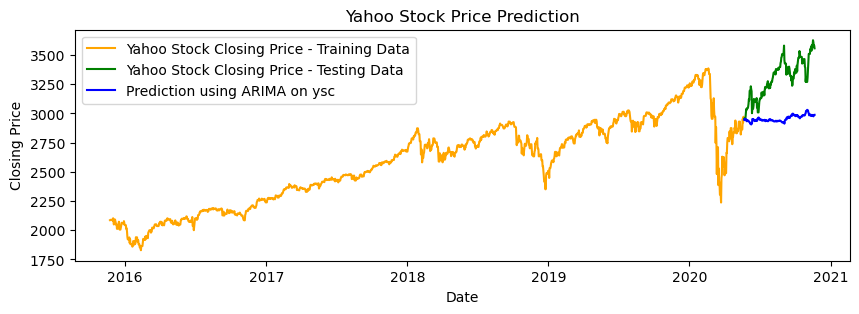

In [33]:
#Plotting the graph that includes the prediction as well as the forecasting on the original data
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_arima1_inv_diff, label='Prediction using ARIMA on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [34]:
#Forecasting on dataset - Difference 1 (Dynamic Points)
#While fitting the model we have input the whole data set 'ysc_diff1' and not just the training part.
#Hence the forecast will generate data beyound the available data in 'ysc_diff1'
forecast_arima1 = result_arima1.forecast(steps=30)

#Displaying the Forecast values
forecast_arima1

2020-11-21    3.506691
2020-11-22    2.977322
2020-11-23   -1.980293
2020-11-24    3.676869
2020-11-25   -1.669599
2020-11-26    3.189465
2020-11-27   -1.185747
2020-11-28    2.744825
2020-11-29   -0.784308
2020-11-30    2.383945
2020-12-01   -0.460233
2020-12-02    2.092997
2020-12-03   -0.199043
2020-12-04    1.858526
2020-12-05    0.011443
2020-12-06    1.669572
2020-12-07    0.181067
2020-12-08    1.517300
2020-12-09    0.317761
2020-12-10    1.394589
2020-12-11    0.427919
2020-12-12    1.295701
2020-12-13    0.516692
2020-12-14    1.216009
2020-12-15    0.588231
2020-12-16    1.151789
2020-12-17    0.645882
2020-12-18    1.100035
2020-12-19    0.692341
2020-12-20    1.058329
Freq: D, Name: predicted_mean, dtype: float64

#### ARIMA 1 - Model Evaluation

In [35]:
#Model Evaluation
#Mean Absolute Error
arima1_mae = metrics.mean_absolute_error(ysc_te, pred_arima1_inv_diff)
print('ARIMA1 MAE:', arima1_mae)

#Mean Squared Error
arima1_mse = metrics.mean_squared_error(ysc_te, pred_arima1_inv_diff)
print('ARIMA1 MSE:', arima1_mse)

#Root Mean Squared Error
arima1_rmse = np.sqrt(arima1_mse)
print('ARIMA1 RMSE:', arima1_rmse)

#Mean Absolute Percentage Error
arima1_mape = metrics.mean_absolute_percentage_error(ysc_te, pred_arima1_inv_diff)
print('ARIMA1 MAPE:', arima1_mape)

#R2
arima1_r2 = 1 - (np.sum((ysc_te - pred_arima1_inv_diff) ** 2) / np.sum((ysc_te - ysc_te.mean()) ** 2))
print('ARIMA1 R2:', arima1_r2)

#AIC
arima1_aic = result_arima1.aic
print('ARIMA1 AIC:', arima1_aic)

#BIC
arima1_bic = result_arima1.bic
print('ARIMA1 BIC:', arima1_bic)

ARIMA1 MAE: 346.6062612854451
ARIMA1 MSE: 145095.41834176864
ARIMA1 RMSE: 380.9139251087687
ARIMA1 MAPE: 0.10279585025327777
ARIMA1 R2: -4.319160271608131
ARIMA1 AIC: 17185.90093106562
ARIMA1 BIC: 17213.44212493901


In [36]:
#Inverting the difference of forecasting
#Now since the forecast is for future data, the inversed difference is made by adding it to the last data point of either
# the whole dataset 'ysc.iloc[-1]' OR last data point of the test set 'ysc_te.iloc[-1]' which are same.
forecast_arima1_orig = ysc.iloc[-1] + forecast_arima1.cumsum()

#Displaying the forecast in terms of original time series
forecast_arima1_orig

2020-11-21    3561.046730
2020-11-22    3564.024052
2020-11-23    3562.043759
2020-11-24    3565.720628
2020-11-25    3564.051029
2020-11-26    3567.240495
2020-11-27    3566.054748
2020-11-28    3568.799573
2020-11-29    3568.015265
2020-11-30    3570.399210
2020-12-01    3569.938977
2020-12-02    3572.031975
2020-12-03    3571.832932
2020-12-04    3573.691457
2020-12-05    3573.702900
2020-12-06    3575.372472
2020-12-07    3575.553539
2020-12-08    3577.070840
2020-12-09    3577.388601
2020-12-10    3578.783190
2020-12-11    3579.211110
2020-12-12    3580.506810
2020-12-13    3581.023502
2020-12-14    3582.239512
2020-12-15    3582.827742
2020-12-16    3583.979531
2020-12-17    3584.625413
2020-12-18    3585.725448
2020-12-19    3586.417789
2020-12-20    3587.476118
Freq: D, Name: predicted_mean, dtype: float64

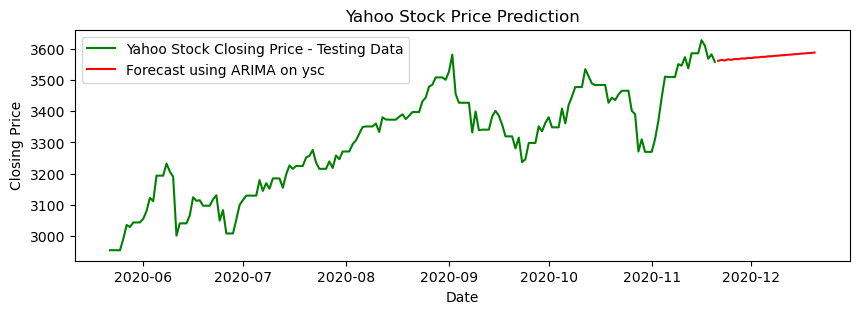

In [37]:
#Plotting the ARIMA forecast for arima1 
plt.figure(figsize=(10, 3))
#plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_arima1_orig, label='Forecast using ARIMA on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

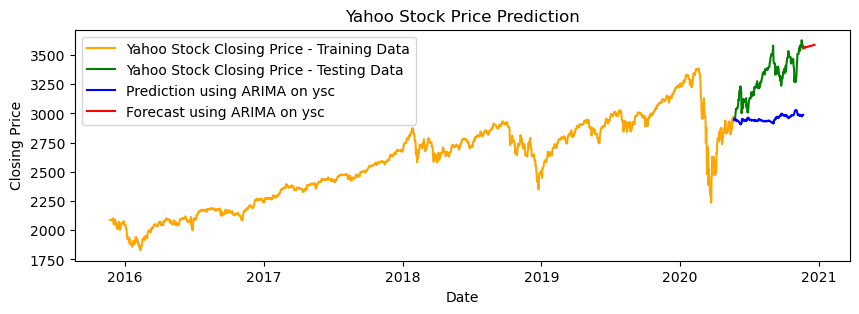

In [38]:
#Plotting the graph that includes the prediction as well as the forecasting on the original data
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_arima1_inv_diff, label='Prediction using ARIMA on ysc', color='blue')
plt.plot(forecast_arima1_orig, label='Forecast using ARIMA on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 1.2. Using the Original Time Series (ysc)

In [39]:
#Fitting the ARIMA model to predict on the original time series ysc
p, d, q = 2, 1, 2
arima2 = ARIMA(ysc, order=(2, 1, 2))
result_arima2 = arima2.fit()

In [40]:
#Predicting on test data - Original TS
pred_arima2 = result_arima2.predict(start = len(ysc_tr), end = len(ysc_tr) + len(ysc_te) -1, typ='levels')

#Displaying the predictions
pred_arima2

2020-05-22    2955.600984
2020-05-23    2955.371645
2020-05-24    2954.570181
2020-05-25    2954.967633
2020-05-26    2955.418914
                 ...     
2020-11-16    3587.857408
2020-11-17    3621.282364
2020-11-18    3615.342391
2020-11-19    3576.832575
2020-11-20    3576.195638
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

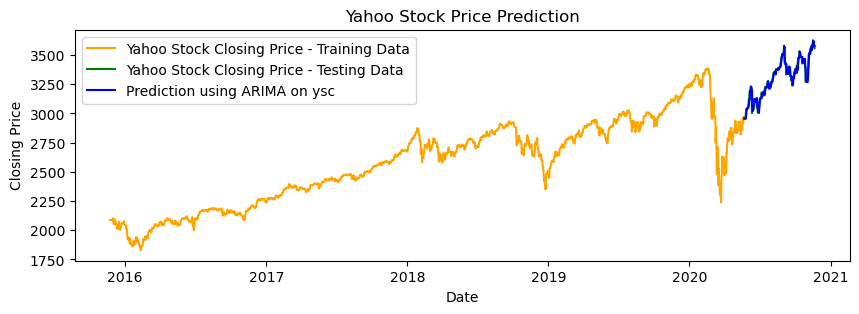

In [41]:
#Plotting the ARIMA prediction for arima2
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_arima2, label='Prediction using ARIMA on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

- Here the predictions are almost 100% accurate as we have used the whole data 'ysc' and then predicted on the part of this data 'ysc_te'.
- Hence we already have exposed the data to the model and on that data we are making predictions.
- So the model performance is highly accurate on this part of the data 'ysc_te'.
* Additionally, as we have used the whole data while fitting the model, the forecast will be made on the data beyound the data available in the TS.

In [42]:
#Defining a function to evaluate a model
def model_evaluation(model, model_name, ts_te, ts_pred):

    #Mean Absolute Error
    mae = metrics.mean_absolute_error(ts_te, ts_pred)
    print(f'{model_name} MAE:', mae)

    #Mean Squared Error
    mse = metrics.mean_squared_error(ts_te, ts_pred)
    print(f'{model_name} MSE:', mse)

    #Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'{model_name} RMSE:', rmse)

    #Mean Absolute Percentage Error
    mape = metrics.mean_absolute_percentage_error(ts_te, ts_pred)
    print(f'{model_name} MAPE:', mape)

    #R2
    r2 = 1 - (np.sum((ts_te - ts_pred) ** 2) / np.sum((ts_te - ts_te.mean()) ** 2))
    print(f'{model_name} R2:', r2)

    #AIC
    aic = model.aic
    print(f'{model_name} AIC:', aic)

    #BIC
    bic = model.bic
    print(f'{model_name} BIC:', bic)
    
    return

In [43]:
#Evaluation of ARIMA2
model_evaluation(result_arima2, 'ARIMA2', ysc_te, pred_arima2)

ARIMA2 MAE: 22.845039642770946
ARIMA2 MSE: 1189.2559774731362
ARIMA2 RMSE: 34.48559086739179
ARIMA2 MAPE: 0.006938603849995727
ARIMA2 R2: 0.9564021854001811
ARIMA2 AIC: 17191.704629960615
ARIMA2 BIC: 17219.24856581379


In [44]:
#Forecasting on this data
forecast_arima2 = result_arima2.forecast(steps=30)

#Displaying the forecasting
forecast_arima2

2020-11-21    3558.167325
2020-11-22    3555.998007
2020-11-23    3555.047222
2020-11-24    3554.909720
2020-11-25    3554.962608
2020-11-26    3554.999749
2020-11-27    3555.008759
2020-11-28    3555.008167
2020-11-29    3555.006898
2020-11-30    3555.006452
2020-12-01    3555.006416
2020-12-02    3555.006452
2020-12-03    3555.006471
2020-12-04    3555.006474
2020-12-05    3555.006474
2020-12-06    3555.006473
2020-12-07    3555.006473
2020-12-08    3555.006473
2020-12-09    3555.006473
2020-12-10    3555.006473
2020-12-11    3555.006473
2020-12-12    3555.006473
2020-12-13    3555.006473
2020-12-14    3555.006473
2020-12-15    3555.006473
2020-12-16    3555.006473
2020-12-17    3555.006473
2020-12-18    3555.006473
2020-12-19    3555.006473
2020-12-20    3555.006473
Freq: D, Name: predicted_mean, dtype: float64

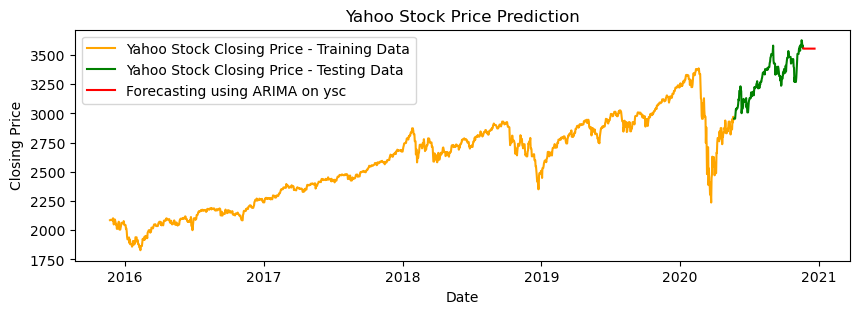

In [45]:
#Plotting this forecast on the
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_arima2, label='Forecasting using ARIMA on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 1.3. Using the Training part of the Original Time Series (ysc_tr)

In [46]:
#Fitting the ARIMA model to predict on the training part of original time series ysc_tr
p, d, q = 2, 1, 2
arima3 = ARIMA(ysc_tr, order=(2, 1, 2))
result_arima3 = arima3.fit()

In [47]:
#Predicting on test data of Original TS (here we have not exposed this data to the model, hence it will be forecast for the model)
pred_arima3 = result_arima3.predict(start = len(ysc_tr), end = len(ysc_tr) + len(ysc_te) -1, typ='levels')

#Displaying the predictions
pred_arima3

2020-05-22    2955.868236
2020-05-23    2956.631878
2020-05-24    2955.615141
2020-05-25    2954.927872
2020-05-26    2954.759569
                 ...     
2020-11-16    2954.874316
2020-11-17    2954.874316
2020-11-18    2954.874316
2020-11-19    2954.874316
2020-11-20    2954.874316
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

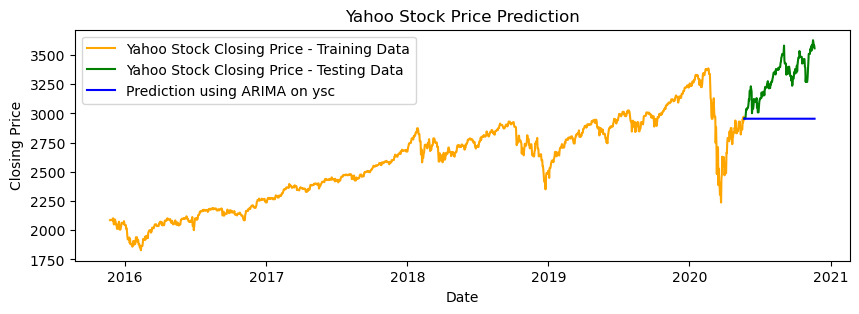

In [48]:
#Plotting the ARIMA prediction for arima2
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_arima3, label='Prediction using ARIMA on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [49]:
#Evaluation of ARIMA3
model_evaluation(result_arima3, 'ARIMA3', ysc_te, pred_arima3)

ARIMA3 MAE: 348.27378995665475
ARIMA3 MSE: 148571.96506382574
ARIMA3 RMSE: 385.45034059373427
ARIMA3 MAPE: 0.10316370390811384
ARIMA3 R2: -4.446609569578363
ARIMA3 AIC: 15343.653596173375
ARIMA3 BIC: 15370.668901628826


In [50]:
#Forecasting on the data beyound test part i.e. beyound ysc_te
#But since the model is fitted on ysc_tr, we need to modify the prediction unlike the above model
forecast_arima3_total = result_arima3.forecast(steps=len(ysc_te) + 30)
forecast_arima3 = forecast_arima3_total[-30:]
#Here the ysc_te is the forecast for the model which we already predicted, we need additional 30 steps to make a forecast

#Displaying the forecasting
forecast_arima3

2020-11-21    2954.874316
2020-11-22    2954.874316
2020-11-23    2954.874316
2020-11-24    2954.874316
2020-11-25    2954.874316
2020-11-26    2954.874316
2020-11-27    2954.874316
2020-11-28    2954.874316
2020-11-29    2954.874316
2020-11-30    2954.874316
2020-12-01    2954.874316
2020-12-02    2954.874316
2020-12-03    2954.874316
2020-12-04    2954.874316
2020-12-05    2954.874316
2020-12-06    2954.874316
2020-12-07    2954.874316
2020-12-08    2954.874316
2020-12-09    2954.874316
2020-12-10    2954.874316
2020-12-11    2954.874316
2020-12-12    2954.874316
2020-12-13    2954.874316
2020-12-14    2954.874316
2020-12-15    2954.874316
2020-12-16    2954.874316
2020-12-17    2954.874316
2020-12-18    2954.874316
2020-12-19    2954.874316
2020-12-20    2954.874316
Freq: D, Name: predicted_mean, dtype: float64

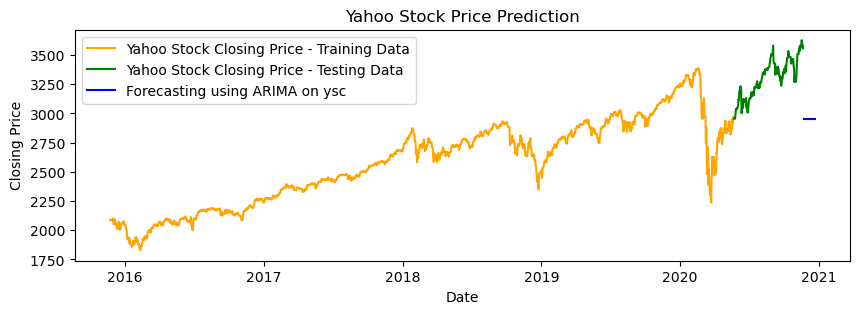

In [51]:
#Plotting the ARIMA prediction for arima2
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_arima3, label='Forecasting using ARIMA on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

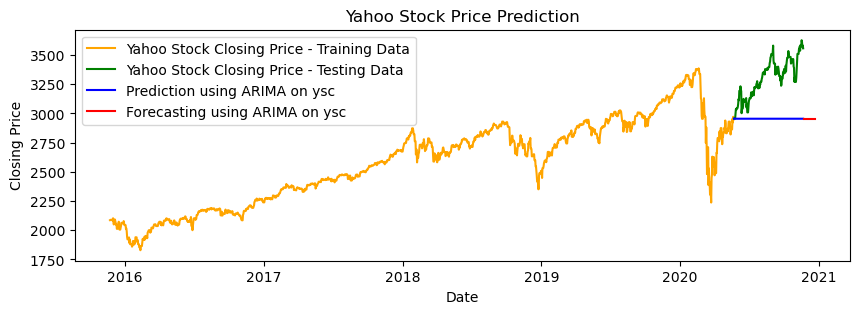

In [52]:
#Plotting the ARIMA prediction for arima2
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_arima3, label='Prediction using ARIMA on ysc', color='blue')
plt.plot(forecast_arima3, label='Forecasting using ARIMA on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

### 2. SARIMA MODEL

#### 2.1. Using the Differenced Time Series (ysc_diff1)

In [53]:
#Fitting the SARIMAX model to predict on the differenced time series ysc_diff1
p, d, q = 2, 1, 2
P, D, Q, s = 2, 1, 2, 30
st1 = time.time()
sarimax1 = SARIMAX(ysc_diff1, order=(2, 1, 2), seasonal_order=(2, 1, 2, 30))
result_sarimax1 = sarimax1.fit()
et1 = time.time()

sarimax1_time = et1 - st1
sarimax1_time

713.8710572719574

In [54]:
#Predicting on the test data
pred_sarimax1 = result_sarimax1.predict(start = len(ysc_diff1_tr), end = len(ysc_diff1_tr) + len(ysc_diff1_te) - 1, typ='levels')

#Displaying the predicitons
pred_sarimax1

2020-05-22     0.763609
2020-05-23    11.052704
2020-05-24    -5.527072
2020-05-25     4.891719
2020-05-26    -7.082544
                ...    
2020-11-16     3.317842
2020-11-17   -15.305214
2020-11-18     9.642357
2020-11-19    12.751435
2020-11-20     4.165616
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

In [55]:
#Inverting the difference
#since we have predicted on the test data, we need to inverse the difference by adding the cummulative sum to the last data
#point of training data 'ysc_tr'
pred_sarimax1_inv_diff = ysc_tr.iloc[-1] + pred_sarimax1.cumsum()

#Displaying the inverted difference on original time series
pred_sarimax1_inv_diff

2020-05-22    2949.273619
2020-05-23    2960.326323
2020-05-24    2954.799251
2020-05-25    2959.690970
2020-05-26    2952.608426
                 ...     
2020-11-16    3031.920820
2020-11-17    3016.615606
2020-11-18    3026.257963
2020-11-19    3039.009397
2020-11-20    3043.175013
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

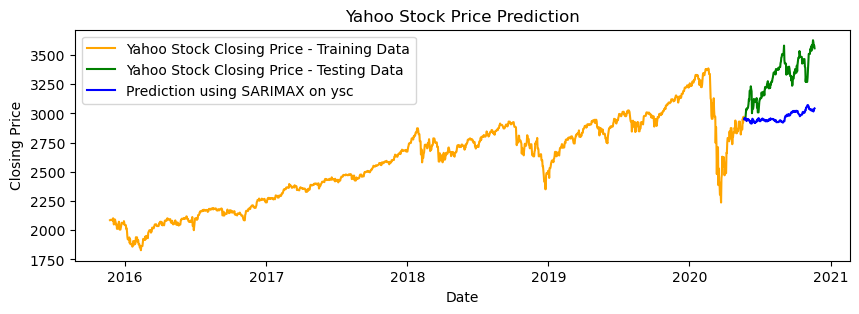

In [56]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax1_inv_diff, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [57]:
#Evaluation of SARIMA 1
model_evaluation(result_sarimax1, 'SARIMA1', ysc_te, pred_sarimax1_inv_diff)

SARIMA1 MAE: 332.78963983816396
SARIMA1 MSE: 132991.31405191735
SARIMA1 RMSE: 364.6797417624365
SARIMA1 MAPE: 0.09877388329910797
SARIMA1 R2: -3.8754269587455257
SARIMA1 AIC: 17035.26563977491
SARIMA1 BIC: 17084.690449037356


In [58]:
#Forecasting will generate result beyound the data of ysc_diff1
forecast_sarimax1 = result_sarimax1.forecast(steps=30)

#Displaying the Forecast
forecast_sarimax1

2020-11-21    -2.062922
2020-11-22     6.963658
2020-11-23    -8.342243
2020-11-24     7.688431
2020-11-25     3.465709
2020-11-26     6.658563
2020-11-27    -2.436136
2020-11-28     2.574793
2020-11-29     1.840505
2020-11-30     5.028256
2020-12-01    -0.735973
2020-12-02     2.006719
2020-12-03    -1.068600
2020-12-04     1.872162
2020-12-05     7.354879
2020-12-06    -3.472442
2020-12-07   -11.087286
2020-12-08     9.037705
2020-12-09    -4.720369
2020-12-10     2.037030
2020-12-11    -7.978109
2020-12-12     3.966812
2020-12-13    -2.260715
2020-12-14     4.933552
2020-12-15    -1.209023
2020-12-16     1.321340
2020-12-17    -0.610509
2020-12-18     1.307896
2020-12-19     8.034065
2020-12-20     1.621259
Freq: D, Name: predicted_mean, dtype: float64

In [59]:
#Inverting the the forecast on the original time series
forecast_sarimax1_orig = ysc.iloc[-1] + forecast_sarimax1.cumsum()

#Displaying the forecast on original time seires
forecast_sarimax1_orig

2020-11-21    3555.477117
2020-11-22    3562.440775
2020-11-23    3554.098531
2020-11-24    3561.786962
2020-11-25    3565.252671
2020-11-26    3571.911235
2020-11-27    3569.475099
2020-11-28    3572.049892
2020-11-29    3573.890398
2020-11-30    3578.918654
2020-12-01    3578.182681
2020-12-02    3580.189400
2020-12-03    3579.120799
2020-12-04    3580.992962
2020-12-05    3588.347840
2020-12-06    3584.875398
2020-12-07    3573.788113
2020-12-08    3582.825818
2020-12-09    3578.105448
2020-12-10    3580.142478
2020-12-11    3572.164369
2020-12-12    3576.131181
2020-12-13    3573.870466
2020-12-14    3578.804018
2020-12-15    3577.594994
2020-12-16    3578.916335
2020-12-17    3578.305826
2020-12-18    3579.613722
2020-12-19    3587.647787
2020-12-20    3589.269046
Freq: D, Name: predicted_mean, dtype: float64

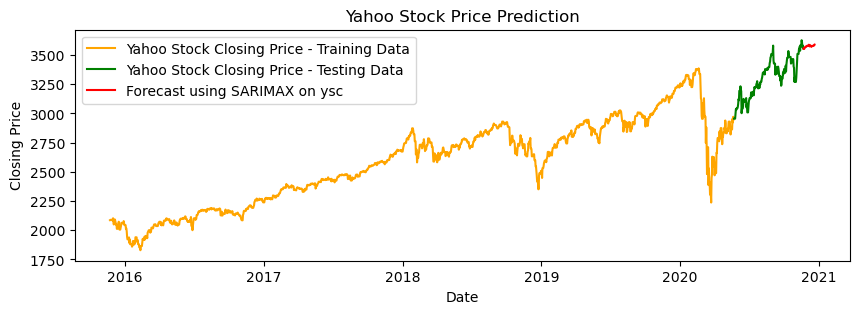

In [60]:
#Plotting this forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_sarimax1_orig, label='Forecast using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

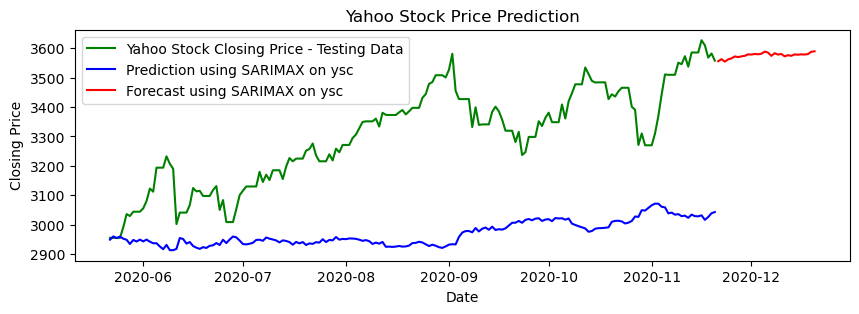

In [61]:
#Plotting this forecast and the prediction together
plt.figure(figsize=(10, 3))
#plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax1_inv_diff, label='Prediction using SARIMAX on ysc', color='blue')
plt.plot(forecast_sarimax1_orig, label='Forecast using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 2.2. Using the Original Time Series (ysc)

In [62]:
#Fitting the SARIMAX model to predict on the differenced time series ysc
p, d, q = 2, 1, 2
P, D, Q, s = 2, 1, 2, 30
st2 = time.time()
sarimax2 = SARIMAX(ysc, order=(2, 1, 2), seasonal_order=(2, 1, 2, 30))
result_sarimax2 = sarimax2.fit()
et2 = time.time()

sarimax2_time = et2 - st2
sarimax2_time

621.9498240947723

In [63]:
#Predicting
pred_sarimax2 = result_sarimax2.predict(start = len(ysc_tr), end = len(ysc_tr) + len(ysc_te) - 1, typ='levels')

#Displaying the predictions
pred_sarimax2

2020-05-22    2960.038597
2020-05-23    2960.069133
2020-05-24    2957.954687
2020-05-25    2952.426638
2020-05-26    2954.850585
                 ...     
2020-11-16    3587.533456
2020-11-17    3615.462801
2020-11-18    3619.663284
2020-11-19    3582.933809
2020-11-20    3579.577214
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

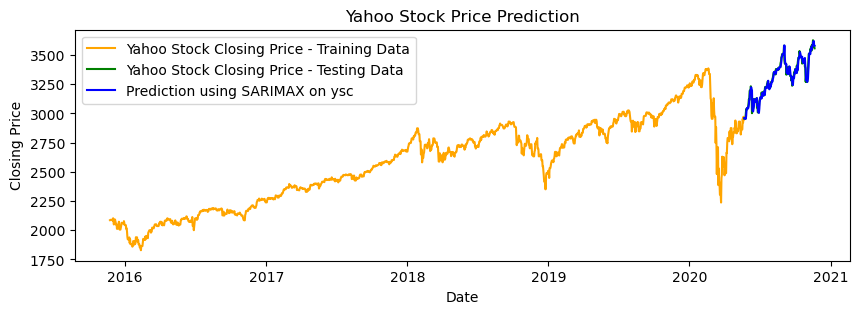

In [64]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax2, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [65]:
#Evaluation of SARIMA 2
model_evaluation(result_sarimax2, 'SARIMA2', ysc_te, pred_sarimax2)

SARIMA2 MAE: 23.053760464073576
SARIMA2 MSE: 1216.0932030621886
SARIMA2 RMSE: 34.87252791327564
SARIMA2 MAPE: 0.0070053548818780655
SARIMA2 R2: 0.9554183396951621
SARIMA2 AIC: 17037.083127906473
SARIMA2 BIC: 17086.512955290043


In [66]:
#Forecasting
forecast_sarimax2 = result_sarimax2.forecast(steps=30)

#Displaying the forecast
forecast_sarimax2

2020-11-21    3554.010963
2020-11-22    3553.169594
2020-11-23    3547.632454
2020-11-24    3550.524082
2020-11-25    3557.090781
2020-11-26    3559.540028
2020-11-27    3558.675293
2020-11-28    3558.594110
2020-11-29    3561.649372
2020-11-30    3564.958601
2020-12-01    3565.277551
2020-12-02    3567.090745
2020-12-03    3566.747186
2020-12-04    3568.171268
2020-12-05    3575.476026
2020-12-06    3570.886451
2020-12-07    3561.797151
2020-12-08    3567.644413
2020-12-09    3563.606109
2020-12-10    3564.813386
2020-12-11    3558.068785
2020-12-12    3560.055774
2020-12-13    3558.746770
2020-12-14    3561.985378
2020-12-15    3561.069690
2020-12-16    3561.237159
2020-12-17    3559.623370
2020-12-18    3560.689947
2020-12-19    3567.801497
2020-12-20    3568.848383
Freq: D, Name: predicted_mean, dtype: float64

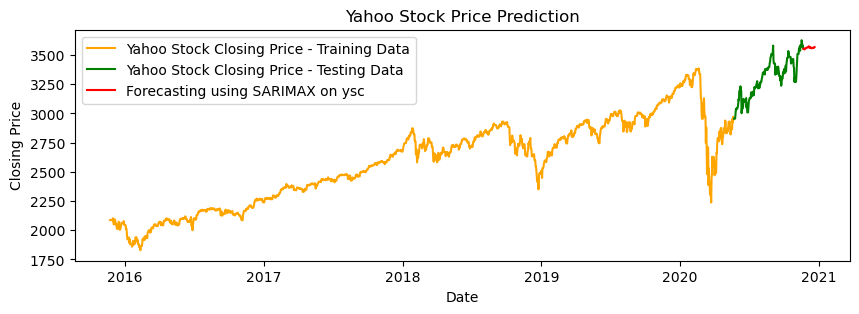

In [67]:
#Plotting this Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_sarimax2[-30:], label='Forecasting using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

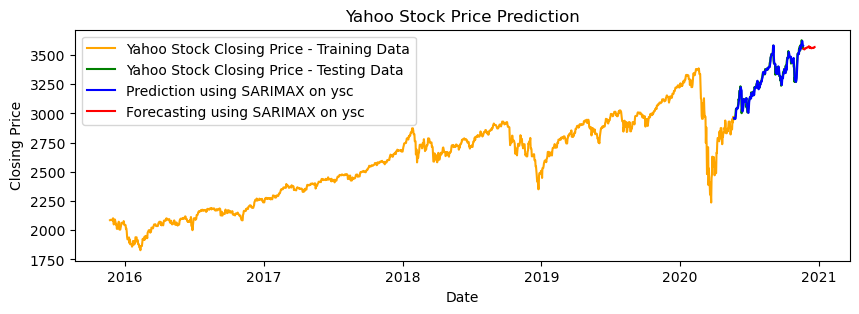

In [68]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax2, label='Prediction using SARIMAX on ysc', color='blue')
plt.plot(forecast_sarimax2, label='Forecasting using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 2.3 Using the Training part of the Original Time Series (ysc_tr)

In [69]:
#Fitting the SARIMAX model to predict on the differenced time series ysc
p, d, q = 2, 1, 2
P, D, Q, s = 2, 1, 2, 30
st3 = time.time()
sarimax3 = SARIMAX(ysc_tr, order=(2, 1, 2), seasonal_order=(2, 1, 2, 30))
result_sarimax3 = sarimax3.fit()
et3 = time.time()

sarimax3_time = et3 - st3
sarimax3_time

698.7410430908203

In [70]:
#Predicting
pred_sarimax3 = result_sarimax3.predict(start = len(ysc_tr), end = len(ysc_tr) + len(ysc_te) - 1, typ='levels')

#Displaying the predictions
pred_sarimax3

2020-05-22    2962.257727
2020-05-23    2963.452800
2020-05-24    2963.800337
2020-05-25    2957.449287
2020-05-26    2960.746866
                 ...     
2020-11-16    3045.673839
2020-11-17    3038.665486
2020-11-18    3046.960184
2020-11-19    3048.531903
2020-11-20    3051.352857
Freq: D, Name: predicted_mean, Length: 183, dtype: float64

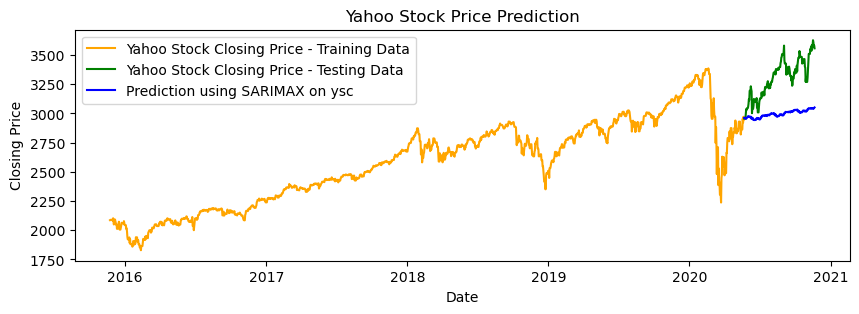

In [71]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax3, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [72]:
#Evaluation of SARIMA 3
model_evaluation(result_sarimax3, 'SARIMA3', ysc_te, pred_sarimax3)

SARIMA3 MAE: 307.30502178602467
SARIMA3 MSE: 114967.02179743661
SARIMA3 RMSE: 339.06787196288093
SARIMA3 MAPE: 0.09108413544532198
SARIMA3 R2: -3.2146610959802446
SARIMA3 AIC: 15181.649366173198
SARIMA3 BIC: 15230.110859621791


In [73]:
#Forecasting
forecast_sarimax3_total = result_sarimax3.forecast(steps=len(ysc_te) + 30)
forecast_sarimax3 = forecast_sarimax3_total[-30:]

#Displaying the forecast
forecast_sarimax3

2020-11-21    3046.831053
2020-11-22    3049.104643
2020-11-23    3045.237792
2020-11-24    3047.909483
2020-11-25    3055.626169
2020-11-26    3057.048541
2020-11-27    3058.341672
2020-11-28    3055.634543
2020-11-29    3060.822552
2020-11-30    3061.131636
2020-12-01    3059.704616
2020-12-02    3061.302812
2020-12-03    3059.635382
2020-12-04    3057.915930
2020-12-05    3065.312136
2020-12-06    3059.789123
2020-12-07    3048.561989
2020-12-08    3055.739091
2020-12-09    3052.011808
2020-12-10    3053.466028
2020-12-11    3041.248672
2020-12-12    3044.776894
2020-12-13    3038.652497
2020-12-14    3042.675511
2020-12-15    3041.196747
2020-12-16    3042.437811
2020-12-17    3043.048258
2020-12-18    3042.984341
2020-12-19    3051.618641
2020-12-20    3055.799538
Freq: D, Name: predicted_mean, dtype: float64

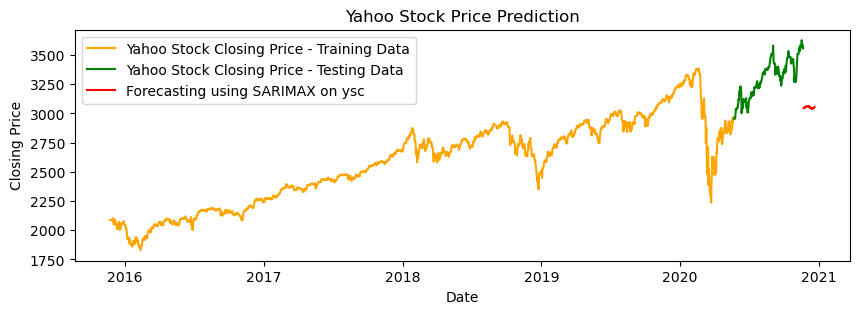

In [74]:
#Plotting this Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_sarimax3, label='Forecasting using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

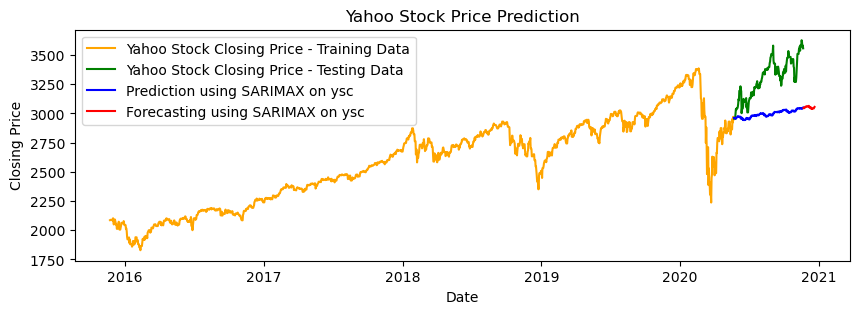

In [75]:
#Plotting the Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_sarimax3, label='Prediction using SARIMAX on ysc', color='blue')
plt.plot(forecast_sarimax3, label='Forecasting using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

### 3. Auto-Arima

#### 3.1. Using the Differenced Time Series (ysc_diff1)

In [ ]:
## !pip install pmdarima

In [76]:
#Fitting the model on differenced time series with test data as out of sample
autoArima1 = pma.auto_arima(ysc_diff1, start_p=0, d=0, start_q=0, max_p=5, max_d=4, max_q=5, seasonal = False, 
                            stationary=True, random_state=36,
                            out_of_sample_size = len(ysc_diff1) - tr_size, error_action='warn', #shows errors ('ignore' silences these)
                            suppress_warnings=True)

In [77]:
#Getting the best params
best_params_aa1 = autoArima1.order
best_params_aa1

(5, 0, 1)

In [78]:
#Getting the summary of the model
print('Summary of "Auto-Arima1" model')
autoArima1.summary()

Summary of "Auto-Arima1" model


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1824
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -8586.490
Date:                Sun, 22 Sep 2024   AIC                          17188.980
Time:                        00:50:16   BIC                          17233.050
Sample:                             0   HQIC                         17205.237
                               - 1824                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3829      0.347      1.103      0.270      -0.298       1.063
ar.L1          0.4084      0.137      2.991      0.003       0.141       0.676
ar.L2          0.1719      0.027      6.430      0.000       0.119       0.224
ar.L3          0.0126      0.012      1.015      0.310      -0.012       0.037
ar.L4          0.0142      0.010      1.480      0.139      -0.005       0.033
ar.L5         -0.0769      0.013     -5.859      0.000      -0.103      -0.051
ma.L1         -0.5771      0.138     -4.169      0.000      -0.848      -0.306
sigma2       718.4470      7.451     96.421      0.000     703.843     733.051
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             70944.46
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               9.72   Skew:                            -1.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
#Predicting
pred_aa1 = autoArima1.predict(len(ysc_diff1_te))

#Displaying the predictions
pred_aa1

array([ 0.43302541, -2.69947445,  2.45907563, -0.49903121,  2.4455951 ,
        1.2553024 ,  1.55215707,  1.06711087,  1.174322  ,  0.89508918,
        0.88914482,  0.81036214,  0.81248345,  0.78753127,  0.79811054,
        0.79751042,  0.80486054,  0.80737581,  0.81172828,  0.81320836,
        0.8147429 ,  0.81514898,  0.81546537,  0.81536982,  0.81529817,
        0.81514416,  0.81504099,  0.81494579,  0.81489357,  0.81485791,
        0.81484356,  0.8148375 ,  0.81483869,  0.81484147,  0.81484527,
        0.81484834,  0.81485076,  0.81485227,  0.81485319,  0.8148536 ,
        0.81485374,  0.81485372,  0.81485364,  0.81485354,  0.81485345,
        0.81485339,  0.81485334,  0.81485332,  0.81485331,  0.8148533 ,
        0.81485331,  0.81485331,  0.81485331,  0.81485331,  0.81485331,
        0.81485332,  0.81485332,  0.81485332,  0.81485332,  0.81485332,
        0.81485332,  0.81485332,  0.81485332,  0.81485332,  0.81485332,
        0.81485332,  0.81485332,  0.81485332,  0.81485332,  0.81

In [80]:
#Inverting the prediction on original time series
pred_aa1_inv_diff = pd.Series(ysc_tr.iloc[-1] + pred_aa1.cumsum(), index = ysc_diff1_te.index)

#Displaying the original predictions
pred_aa1_inv_diff

Date
2020-05-22    2948.943035
2020-05-23    2946.243561
2020-05-24    2948.702636
2020-05-25    2948.203605
2020-05-26    2950.649200
                 ...     
2020-11-16    3094.289482
2020-11-17    3095.104336
2020-11-18    3095.919189
2020-11-19    3096.734042
2020-11-20    3097.548895
Length: 183, dtype: float64

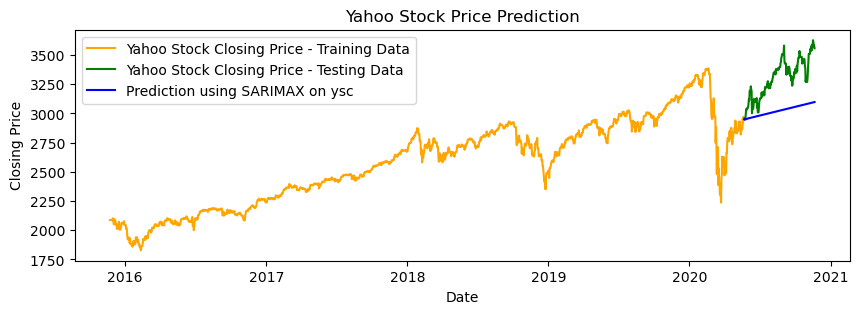

In [81]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_aa1_inv_diff, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [82]:
#Evaluation of Auto-Arima1
model_evaluation(autoArima1, 'Auto-Arima1', ysc_te, pred_aa1_inv_diff)

Auto-Arima1 MAE: 279.825540342645
Auto-Arima1 MSE: 95117.5310085344
Auto-Arima1 RMSE: 308.4113016874291
Auto-Arima1 MAPE: 0.0829638260146492
Auto-Arima1 R2: -2.4869839299977676
Auto-Arima1 AIC: <bound method ARIMA.aic of ARIMA(order=(5, 0, 1), out_of_sample_size=183, scoring_args={},
      suppress_warnings=True)>
Auto-Arima1 BIC: <bound method ARIMA.bic of ARIMA(order=(5, 0, 1), out_of_sample_size=183, scoring_args={},
      suppress_warnings=True)>


In [83]:
#Forecasting
forecast_aa1_total = autoArima1.predict(len(ysc_diff1_te) + 30)
forecast_aa1 = forecast_aa1_total[-30:]

#Displaying the forecast values
forecast_aa1

array([0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332,
       0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332,
       0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332,
       0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332,
       0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332,
       0.81485332, 0.81485332, 0.81485332, 0.81485332, 0.81485332])

In [84]:
#Considering the last 30 steps as forecast because the previuos values are predictions and converting this forecast to pandas series
forecast_aa1_inv_diff = pd.Series(ysc_te.iloc[-1] + forecast_aa1.cumsum()[-30], index = pd.date_range(start=ysc_te.index[-1] + pd.DateOffset(days=1), periods=30))

#Displaying the forecast
forecast_aa1_inv_diff

2020-11-21    3558.354892
2020-11-22    3558.354892
2020-11-23    3558.354892
2020-11-24    3558.354892
2020-11-25    3558.354892
2020-11-26    3558.354892
2020-11-27    3558.354892
2020-11-28    3558.354892
2020-11-29    3558.354892
2020-11-30    3558.354892
2020-12-01    3558.354892
2020-12-02    3558.354892
2020-12-03    3558.354892
2020-12-04    3558.354892
2020-12-05    3558.354892
2020-12-06    3558.354892
2020-12-07    3558.354892
2020-12-08    3558.354892
2020-12-09    3558.354892
2020-12-10    3558.354892
2020-12-11    3558.354892
2020-12-12    3558.354892
2020-12-13    3558.354892
2020-12-14    3558.354892
2020-12-15    3558.354892
2020-12-16    3558.354892
2020-12-17    3558.354892
2020-12-18    3558.354892
2020-12-19    3558.354892
2020-12-20    3558.354892
Freq: D, dtype: float64

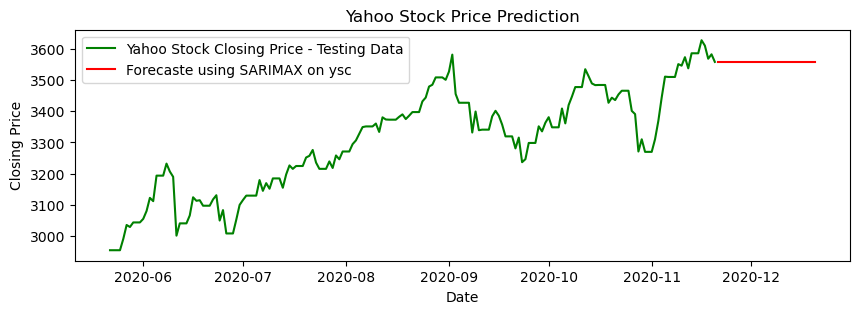

In [85]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
#plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_aa1_inv_diff, label='Forecaste using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

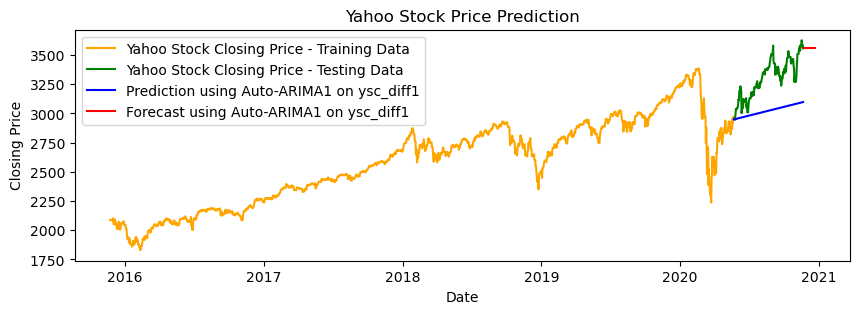

In [86]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_aa1_inv_diff, label='Prediction using Auto-ARIMA1 on ysc_diff1', color='blue')
plt.plot(forecast_aa1_inv_diff, label='Forecast using Auto-ARIMA1 on ysc_diff1', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 3.2. Using the Original Time Series (ysc) - with 'out of sample size'  as test data length

In [87]:
#Fitting the model
autoArima2 = pma.auto_arima(ysc, start_p=0, d=0, start_q=0, max_p=5, max_d=4, max_q=5, seasonal = False, stationary=False,
                            random_state=36,
                            out_of_sample_size = len(ysc) - tr_size,
                            error_action='warn', #shows errors ('ignore' silences these)
                            suppress_warnings=True)

In [88]:
#Displayin the best params
best_params_aa2 = autoArima2.order
best_params_aa2

(3, 0, 2)

In [89]:
#Displaying the summary
print('Summary of the model - AutoArima2')
autoArima2.summary()

Summary of the model - AutoArima2


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -8563.432
Date:                Sun, 22 Sep 2024   AIC                          17140.863
Time:                        00:51:30   BIC                          17179.429
Sample:                             0   HQIC                         17155.089
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.3535     17.061      0.431      0.666     -26.085      40.792
ar.L1         -0.8297      0.013    -65.355      0.000      -0.855      -0.805
ar.L2          0.9359      0.004    245.839      0.000       0.928       0.943
ar.L3          0.8911      0.012     73.980      0.000       0.868       0.915
ma.L1          1.7373      0.017    103.640      0.000       1.704       1.770
ma.L2          0.7798      0.017     46.789      0.000       0.747       0.812
sigma2       694.2560      7.680     90.397      0.000     679.203     709.309
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):             41743.52
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               8.67   Skew:                            -1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
#Predicting
pred_aa2 = autoArima2.predict(30)

#Displaying the predictions
pred_aa2

array([3549.82930197, 3558.40650964, 3547.3780311 , 3557.68449883,
       3546.45509686, 3555.59016079, 3546.68561048, 3552.61639071,
       3547.50238113, 3549.36101197, 3548.31779494, 3546.36562992,
       3548.66527215, 3544.00061449, 3548.28348476, 3542.41363651,
       3547.13538011, 3541.54076754, 3545.37091498, 3541.16473992,
       3543.25373166, 3540.99710031, 3541.07628868, 3540.76017206,
       3539.08563695, 3540.24971775, 3537.4350016 , 3539.36761474,
       3536.16719676, 3538.12305015])

- Here prediction will be made for the data beyound the data available in the provided TS.
- Directly Forecasting will be done.
- Auto-Arima doesnot have forecast function. It only uses predict attribute and predicts either on the given TS, if there is no 'out-of-sample-size' given, or if the 'out-of'sample' size is provided, it predicts beyound this data.

In [91]:
#Converting the data points into series
pred_aa2_series = pd.Series(pred_aa2, index = pd.date_range(start=ysc_te.index[-1] + pd.DateOffset(days=1), periods=30))
pred_aa2_series

2020-11-21    3549.829302
2020-11-22    3558.406510
2020-11-23    3547.378031
2020-11-24    3557.684499
2020-11-25    3546.455097
2020-11-26    3555.590161
2020-11-27    3546.685610
2020-11-28    3552.616391
2020-11-29    3547.502381
2020-11-30    3549.361012
2020-12-01    3548.317795
2020-12-02    3546.365630
2020-12-03    3548.665272
2020-12-04    3544.000614
2020-12-05    3548.283485
2020-12-06    3542.413637
2020-12-07    3547.135380
2020-12-08    3541.540768
2020-12-09    3545.370915
2020-12-10    3541.164740
2020-12-11    3543.253732
2020-12-12    3540.997100
2020-12-13    3541.076289
2020-12-14    3540.760172
2020-12-15    3539.085637
2020-12-16    3540.249718
2020-12-17    3537.435002
2020-12-18    3539.367615
2020-12-19    3536.167197
2020-12-20    3538.123050
Freq: D, dtype: float64

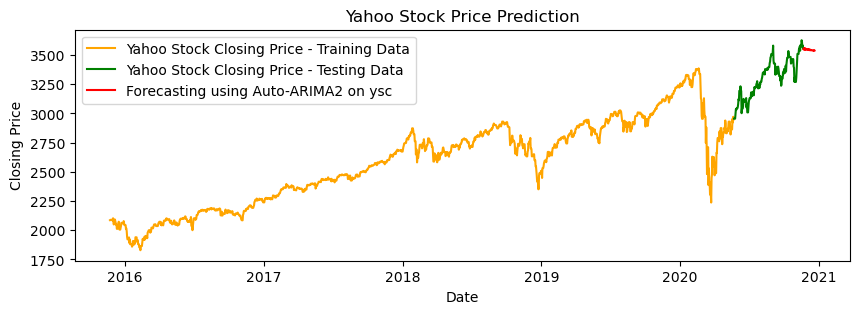

In [92]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_aa2_series, label='Forecasting using Auto-ARIMA2 on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 3.3. Using the training data of Original Time Series (ysc_tr) - with no 'out of sample size' data

In [93]:
autoArima3 = pma.auto_arima(ysc_tr, start_p=0, d=0, start_q=0, max_p=5, max_d=2, max_q=5, seasonal=False, stationary=False,
                            random_state=36,
                            #out_of_sample_size = len(ysc) - tr_size,
                            error_action='warn', #shows errors ('ignore' silences these)
                            suppress_warnings=True)

In [94]:
#Displayin the best params
best_params_aa3 = autoArima3.order
best_params_aa3

(3, 0, 2)

In [95]:
#Displaying the summary
print('Summary of the model - Auto-Arima3')
autoArima3.summary()

Summary of the model - Auto-Arima3


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1642
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -7641.952
Date:                Sun, 22 Sep 2024   AIC                          15297.904
Time:                        00:52:08   BIC                          15335.730
Sample:                    11-23-2015   HQIC                         15311.932
                         - 05-21-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.7977     21.051      0.465      0.642     -31.462      51.058
ar.L1         -0.8427      0.011    -74.216      0.000      -0.865      -0.820
ar.L2          0.9352      0.004    217.523      0.000       0.927       0.944
ar.L3          0.9035      0.011     82.469      0.000       0.882       0.925
ma.L1          1.7558      0.015    116.238      0.000       1.726       1.785
ma.L2          0.7983      0.015     52.898      0.000       0.769       0.828
sigma2       642.8459      7.204     89.231      0.000     628.726     656.966
===================================================================================
Ljung-Box (L1) (Q):                   2.96   Jarque-Bera (JB):             52857.06
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               7.71   Skew:                            -1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
#Prediction
pred_aa3 = autoArima3.predict(len(ysc_te))

#Displaying the predictinos
pred_aa3

2020-05-22    2949.097364
2020-05-23    2953.304166
2020-05-24    2943.232874
2020-05-25    2956.184545
2020-05-26    2939.652752
                 ...     
2020-11-16    2872.344803
2020-11-17    2871.950573
2020-11-18    2871.551127
2020-11-19    2871.157586
2020-11-20    2870.759446
Freq: D, Length: 183, dtype: float64

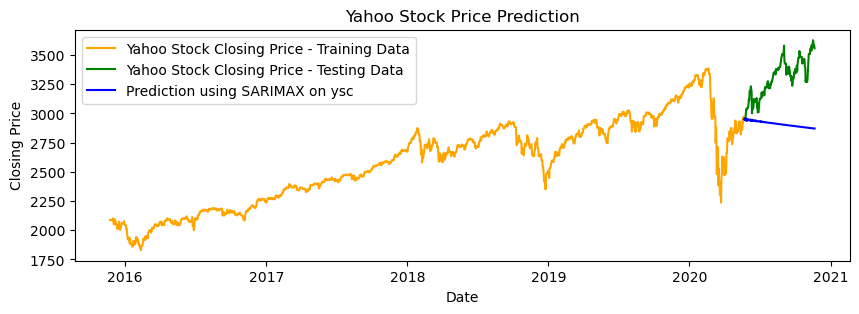

In [97]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_aa3, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [98]:
#Predicting beyound the TS data
forecast_aa3 = autoArima3.predict(len(ysc_te) + 30)[-30:]

#Displaying the forecast
forecast_aa3

2020-11-21    2870.365992
2020-11-22    2869.969622
2020-11-23    2869.575937
2020-11-24    2869.181497
2020-11-25    2868.787569
2020-11-26    2868.394929
2020-11-27    2868.001000
2020-11-28    2867.609826
2020-11-29    2867.216289
2020-11-30    2866.826153
2020-12-01    2866.433430
2020-12-02    2866.043934
2020-12-03    2865.652373
2020-12-04    2865.263232
2020-12-05    2864.873036
2020-12-06    2864.484126
2020-12-07    2864.095332
2020-12-08    2863.706691
2020-12-09    2863.319191
2020-12-10    2862.930976
2020-12-11    2862.544570
2020-12-12    2862.157003
2020-12-13    2861.771459
2020-12-14    2861.384758
2020-12-15    2860.999876
2020-12-16    2860.614208
2020-12-17    2860.229857
2020-12-18    2859.845303
2020-12-19    2859.461443
2020-12-20    2859.078000
Freq: D, dtype: float64

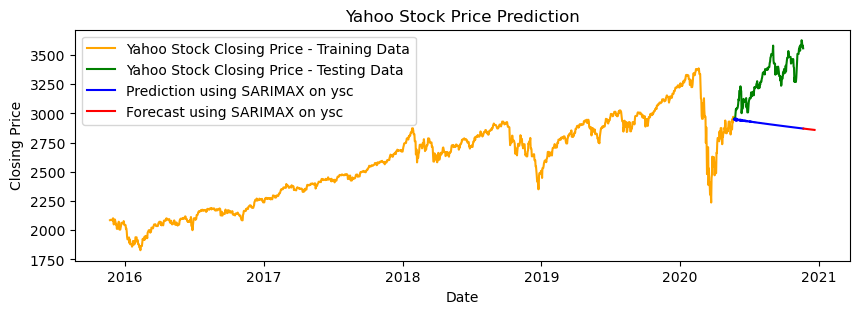

In [99]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_aa3, label='Prediction using SARIMAX on ysc', color='blue')
plt.plot(forecast_aa3, label='Forecast using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 3.4. Using the Differenced Time Series (ysc_diff1) - SARIMA model

In [22]:
#Fitting the model on differenced time series with test data as out of sample
st4 = time.time()
autoSarima1 = pma.auto_arima(ysc_diff1, start_p=0, d=0, start_q=0, max_p=3, max_d=2, max_q=3, sart_P = 1, D = 0, start_Q = 1,
                             max_P=3, max_D=2, max_Q=3, stationary=True, random_state=36, seasonal = True, m=30,
                             out_of_sample_size = len(ysc_diff1) - tr_size, error_action='warn', #shows errors ('ignore' silences these)
                             suppress_warnings=True)
et4 = time.time()
autoSarima1_time = et4 - st4
autoSarima1_time

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\smit1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\smit1\AppData\Local\Temp\ipykernel_23560\2384690903.py", line 3, in <module>
    autoSarima1 = pma.auto_arima(ysc_diff1, start_p=0, d=0, start_q=0, max_p=3, max_d=2, max_q=3, sart_P = 1, D = 0, start_Q = 1,
  File "C:\Users\smit1\anaconda3\lib\site-packages\pmdarima\arima\auto.py", line 701, in auto_arima
    sorted_res = search.solve()
  File "C:\Users\smit1\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 405, in solve
    self._do_fit((p, d, q + 1), (P, D, Q, m)):
  File "C:\Users\smit1\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 235, in _do_fit
    fit, fit_time, new_ic = self._fit_arima(
  File "C:\Users\smit1\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit

In [ ]:
#Getting the best params
best_params_asa1 = autoSarima1.order
best_params_asa1

In [ ]:
#Getting the summary of the model
print('Summary of "Auto-Sarima1" model')
autoSarima1.summary()

In [ ]:
#Predicting
pred_asa1 = autoSarima1.predict(len(ysc_diff1_te))

#Displaying the predictions
pred_asa1

In [ ]:
#Inverting the prediction on original time series
pred_asa1_inv_diff = pd.Series(ysc_tr.iloc[-1] + pred_asa1.cumsum(), index = ysc_diff1_te.index)

#Displaying the original predictions
pred_asa1_inv_diff

In [ ]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_asa1_inv_diff, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [ ]:
#Evaluation of Auto-Sarima1
model_evaluation(autoSarima1, 'Auto-Sarima1', ysc_te, pred_asa1_inv_diff)

In [ ]:
#Forecasting
forecast_asa1_total = autoSarima1.predict(len(ysc_diff1_te) + 30)
forecast_asa1 = forecast_asa1_total[-30:]

#Displaying the forecast values
forecast_asa1

In [ ]:
#Considering the last 30 steps as forecast because the previuos values are predictions and converting this forecast to pandas series
forecast_asa1_inv_diff = pd.Series(ysc_te.iloc[-1] + forecast_asa1.cumsum()[-30], index = pd.date_range(start=ysc_te.index[-1] + pd.DateOffset(days=1), periods=30))

#Displaying the forecast
forecast_asa1_inv_diff

In [ ]:
#Plotting this Forecast
plt.figure(figsize=(10, 3))
#plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(forecast_asa1_inv_diff, label='Forecaste using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 3.5. Using the Original Time Series (ysc) - with 'out of sample size'  as test data length - SARIMA model

In [ ]:
#Fitting the model
st5 = time.time()
autoSarima2 = pma.auto_arima(ysc, start_p=0, d=0, start_q=0, max_p=3, max_d=2, max_q=3, sart_P = 1, D = 0, start_Q = 1,
                             max_P=3, max_D=2, max_Q=3, m = 30, seasonal = True, stationary=False, random_state=36,
                             out_of_sample_size = len(ysc) - tr_size,
                             error_action='warn', #shows errors ('ignore' silences these)
                             suppress_warnings=True)

et5 = time.time()
autoSarima2_time = et5 - et5
autoSarima2_time

In [ ]:
#Getting the best params
best_params_asa2 = autoSarima2.order
best_params_asa2

In [ ]:
#Getting the summary of the model
print('Summary of "Auto-Sarima2" model')
autoSarima2.summary()

In [ ]:
#Predicting
pred_asa2 = autoSarima2.predict(30)

#Displaying the predictions
pred_asa2

In [ ]:
#Converting the data points into series
pred_asa2_series = pd.Series(pred_asa2, index = pd.date_range(start=ysc_te.index[-1] + pd.DateOffset(days=1), periods=30))
pred_asa2_series

In [ ]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_asa2_series, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

#### 3.6. Using the training data of Original Time Series (ysc_tr) - with no 'out of sample size' data

In [ ]:
#Fitting the model
st6 = time.time()
autoSarima3 = pma.auto_arima(ysc_tr, start_p=0, d=0, start_q=0, max_p=3, max_d=2, max_q=3, sart_P = 1, D = 0, start_Q = 1,
                             max_P=3, max_D=2, max_Q=3, m = 30, seasonal = True, stationary=False, random_state=36,
                             #out_of_sample_size = len(ysc) - tr_size,
                             error_action='warn', #shows errors ('ignore' silences these)
                             suppress_warnings=True)

et6 = time.time()
autoSarima3_time = et6 - et6
autoSarima3_time

In [ ]:
#Getting the best params
best_params_asa3 = autoSarima3.order
best_params_asa3

In [ ]:
#Getting the summary of the model
print('Summary of "Auto-Sarima3" model')
autoSarima3.summary()

In [ ]:
#Prediction
pred_asa3 = autoSarima3.predict(len(ysc_te))

#Displaying the predictinos
pred_asa3

In [ ]:
#Plotting this Prediction
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_asa3, label='Prediction using SARIMAX on ysc', color='blue')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

In [ ]:
#Predicting beyound the TS data
forecast_asa3 = autoArima3.predict(len(ysc_te) + 30)[-30:]

#Displaying the forecast
forecast_asa3

In [ ]:
#Plotting this Prediction and Forecast
plt.figure(figsize=(10, 3))
plt.plot(ysc_tr, label='Yahoo Stock Closing Price - Training Data', color='orange')
plt.plot(ysc_te, label='Yahoo Stock Closing Price - Testing Data', color='green')
plt.plot(pred_asa3, label='Prediction using SARIMAX on ysc', color='blue')
plt.plot(forecast_asa3, label='Forecast using SARIMAX on ysc', color='red')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()